<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_04/lab_04.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [13]:
#Importar librerias.
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [14]:
# cargar datos.
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

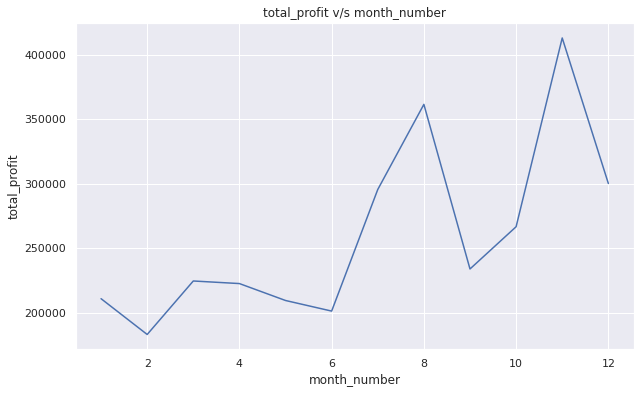

In [21]:
#Gráfico de linea.
plt.figure(figsize=(10, 6))#tamaño.
palette = sns.color_palette("hls", 8)#Elección de color.
sns.lineplot(
    x='month_number',#Eje y.
    y='total_profit',#Eje x.
    data=df,#DataFrame.
    ci = None,#Sin tamaño de intervalo de confianza.
    palette=palette#Color.
)
plt.title('total_profit v/s month_number') #Titulo.
plt.xlabel('month_number') #Titulo eje x.
plt.ylabel('total_profit') #Titulo eje y.  
plt.show()#Mostrar Gráfico.

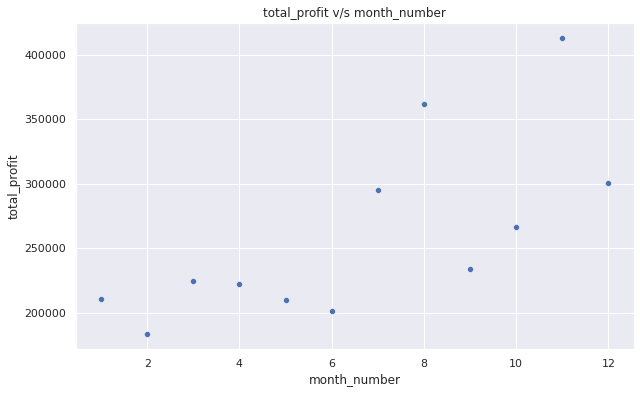

In [22]:
#Grafico de dispersión.
plt.figure(figsize=(10, 6))#Tamaño.
sns.scatterplot(
    x='month_number',#Eje x.
    y='total_profit',#Eje y.
    data=df,#DataFrame.
    palette=palette#Color.
)
plt.title('total_profit v/s month_number') #Titulo.
plt.xlabel('month_number') #Titulo eje x.
plt.ylabel('total_profit') #Titulo eje y.    
plt.show()#Mostrar Gráfico.

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

In [24]:
#Crear DataFrame dfm. 
dfm = df.melt(id_vars='month_number',#Columna para identificar variables.
              value_vars=['facecream',	'facewash',	'toothpaste',	'bathingsoap',	'shampoo',	'moisturizer'] ,#trasforma variables en observaciones.
              var_name='cols',#Nombre de nueva variable.
              value_name='value')#Valores de nueva observaciones de la nueva variable.
print("dfm:")
dfm

dfm:


,month_number,cols,value
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
...,...,...,...
67,8,moisturizer,1400
68,9,moisturizer,1780
69,10,moisturizer,1890
70,11,moisturizer,2100


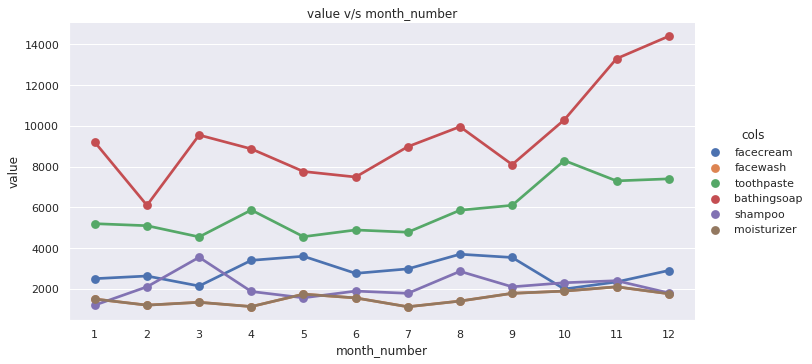

In [25]:
#Gráfico multilinea.
g = sns.catplot(
    x="month_number",#Eje x. 
    y="value",#Eje y.
    hue='cols',#Categorias.
    data=dfm,#DataFrame.
    kind='point',#Forma. 
    orient='v',#Orientación vertical.
    height=5,#Altura.
    aspect=2)#Dimensiones.
plt.title('value v/s month_number') #Titulo.
plt.xlabel('month_number') #Titulo eje x.
plt.ylabel('value') #Titulo eje y.    
plt.show()#Mostrar Gráfico.

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

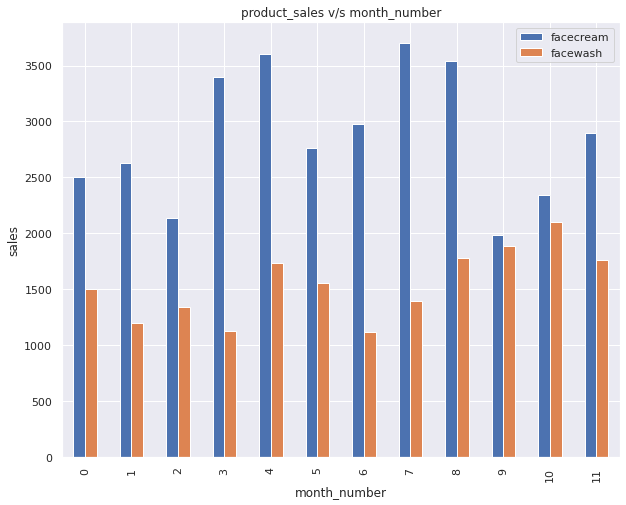

In [26]:
#Gráfico de barras.
df[['facecream', 'facewash']].plot.bar()#Barras de las dos variables.
plt.title('product_sales v/s month_number')#Título.
plt.xlabel('month_number')#Eje x.
plt.ylabel('sales')#Eje y.
plt.show()#Mostrar gráfico.

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

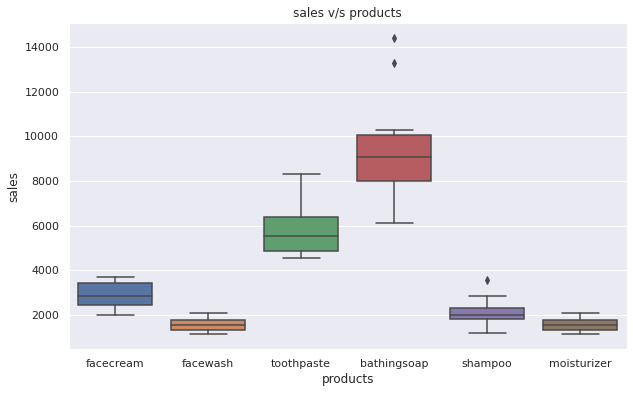

In [27]:
#Gráfico box-plot.
df_box = df.drop(['month_number','total_units','total_profit'], axis=1)#Variables excluidas.
plt.figure(figsize=(10, 6))#Tamaño.
sns.boxplot(data=df_box)#Grafico de df_box.
plt.title('sales v/s products')#Título.
plt.xlabel('products')#Eje x.
plt.ylabel('sales')#Eje y.
plt.show()#Mostrar gráfico.


5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

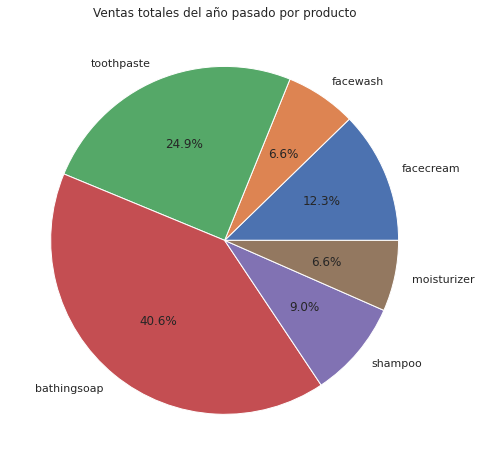

In [29]:
#Grafico circular.
df_circle=df.drop(['month_number','total_units','total_profit'], axis=1)#Variables excluidas.
Total=df_circle[df_circle.columns[0:]].sum()#Total de ventas de productos. 
plt.pie(Total, labels=df_circle.columns, autopct='%1.1f%%')#Grafico cicular.
plt.title('total_sales_of_last_year')#Titulo.
plt.show()#Mostrar gráfico.